In [12]:
from scripts.SimulatedUser import SimulatedUser
from utils.ElasticSearch import create_elasticsearch_client, create_index, index_news_articles
from utils.sqlitedb import save_user_profile, create_db, delete_db

First, delete any current user profile database and create a new one.

In [13]:
delete_db()
create_db()

Database deleted successfully.
Database and table created successfully.


In [14]:
DATA_FILE = "data/News_Category_Dataset_v3.json"
client = create_elasticsearch_client()
index_name = "news_articles"
create_index(client, index_name)

Index 'news_articles' already exists and will be used.


## Random User Generation

In [15]:
# # # Define the number of users and queries per user
# num_users = 10
# num_queries_per_user = 100

# # Simulate users' search behavior
# simulated_users = []
# for i in range(num_users):
#   user = SimulatedUser(user_id=i+1)
#   user.simulate_search(client, index_name, num_queries_per_user)
#   simulated_users.append(user)

# # Print profiles
# for user in simulated_users:
#   # user.print_profile()
#   save_user_profile(user.profile)

## Targeted User Generation

In [16]:
import random
# Fix the seed for reproducibility
random.seed(42)

In [17]:
num_queries_per_user = 500

# Define targeted user preferences
targeted_users = [
  (SimulatedUser(user_id="sportive"), ["SPORTS", "HEALTHY LIVING", "ENTERTAINMENT", "TRAVEL"]),
  (SimulatedUser(user_id="activist"), ["POLITICS", "BLACK VOICES", "QUEER VOICES"]),
  (SimulatedUser(user_id="businessman"), ["BUSINESS"])
]

# Simulate search behavior for targeted users and print profiles
for user, preferences in targeted_users:
  user.simulate_search_targeted(client, index_name, num_queries_per_user, preferences)
  # user.print_profile()
  save_user_profile(user.profile)

### Searching "New York"

**Results**

| DCG | Sportive | Activism |
|-----|----------|----------|
| Not Personalized | 9.84 | 9.82 |
| Personalized | 14.89 | 18.57 |




In [18]:
# Not-personalized search

from utils.search import build_query, QUERY_TEMPLATE

query = "New York"
query_type = "intersection"

query = build_query(query_type, query)

# Perform the search
response = client.search(index=index_name, body=query, size=20)
# Get the entries from the response
entries = response['hits']['hits']
print(f"Not-personalized, Number of hits: {len(entries)}")

# Print the entries
for entry in entries:
    print(f"Title: {entry['_source']['headline']}")
    print(f"Category: {entry['_source']['category']}")
    print(f"Content: {entry['_source']['short_description']}")
    # print(f"Score: {entry['_score']}")
    print("")

Not-personalized, Number of hits: 20
Title: Starbucks Is Opening A HUGE New Roastery In New York City
Category: TASTE
Content: Just what New York needs.

Title: 5 Reasons To Love The New York City Marathon
Category: SPORTS
Content: The New York City Marathon is the largest, most popular marathon in the world! There’s no weekend in New York City more electric

Title: 8 Things Even New Yorkers Don't Know About New York City
Category: TRAVEL
Content: New York was the "Big Orange" before the "Big Apple."

Title: The Lexington New York City -- Old New York Meets New New York
Category: STYLE & BEAUTY
Content: The Lexington New York City grand opening was celebrated by the art and fashion world. The historic and stylish landmark midtown Manhattan hotel was originally opened in 1929 and re-opened after a $46 million renovation.

Title: New Combinations at New York City Ballet
Category: ARTS
Content: "New Combinations" was the perfect title for the program at New York City Ballet, which present

/tmp/ipykernel_1415/1753405645.py:11: DeprecationWarning: Received 'size' via a specific parameter in the presence of a 'body' parameter, which is deprecated and will be removed in a future version. Instead, use only 'body' or only specific parameters.
  response = client.search(index=index_name, body=query, size=20)


**Sportive**

```
Starbucks Is Opening A HUGE New Roastery In New York City: 1
5 Reasons To Love The New York City Marathon: 3
8 Things Even New Yorkers Don't Know About New York City: 3
The Lexington New York City -- Old New York Meets New New York: 1
New Combinations at New York City Ballet: 1
Former New York Senate Leader Dean Skelos Convicted Of Extortion Charges: 1
New York State Announces First Confirmed Coronavirus Case: 1
Virus Fight Stalls In Early Hot Spots New York, New Jersey: 1
New York Man Arrested In Attack On Gay West Point Couple: 1
Fashion's Night Out Ads: New York vs. Los Angeles (VIDEOS, POLL): 1
Iconic New York Columnist Jimmy Breslin Dead At 88: 1
5 New York City Oyster Joints For Every Occasion: 3
New York City Restaurants Consider Charging More For Tables During Peak Hours: 1
Underdog Sanders Outspends Clinton On Airwaves In New York: 1
New York City's Craziest Prenup Agreements: 1
New York City Congressman Supports Trump's Muslim Ban: 1
Fox News' Shepard Smith Gets Emotional Paying Tribute To New York City: 1
Ted Cruz Hits New York Times, Defends Campaign Loans: 1
New York Columnist Jimmy Breslin Dies: 1
Measles Outbreak Confirmed In New York City: 1
```

In [29]:
rel = [1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1]

from math import log2
def dcg(rel):
    dcg = 0
    for i in range(len(rel)):
        dcg += rel[i] / log2(i + 2)
    return dcg

print(f"DCG of sportive on not-personalized search: {dcg(rel)}")

DCG of sportive on not-personalized search: 9.842604197921068


**Activism**

    Starbucks Is Opening A HUGE New Roastery In New York City - Score: 1
    5 Reasons To Love The New York City Marathon - Score: 1
    8 Things Even New Yorkers Don't Know About New York City - Score: 1
    The Lexington New York City -- Old New York Meets New New York - Score: 1
    New Combinations at New York City Ballet - Score: 1
    Former New York Senate Leader Dean Skelos Convicted Of Extortion Charges - Score: 3
    New York State Announces First Confirmed Coronavirus Case - Score: 1
    Virus Fight Stalls In Early Hot Spots New York, New Jersey - Score: 1
    New York Man Arrested In Attack On Gay West Point Couple - Score: 3
    Fashion's Night Out Ads: New York vs. Los Angeles (VIDEOS, POLL) - Score: 1
    Iconic New York Columnist Jimmy Breslin Dead At 88 - Score: 1
    5 New York City Oyster Joints For Every Occasion - Score: 1
    New York City Restaurants Consider Charging More For Tables During Peak Hours - Score: 1
    Underdog Sanders Outspends Clinton On Airwaves In New York - Score: 3
    New York City's Craziest Prenup Agreements - Score: 1
    New York City Congressman Supports Trump's Muslim Ban - Score: 3
    Fox News' Shepard Smith Gets Emotional Paying Tribute To New York City - Score: 1
    Ted Cruz Hits New York Times, Defends Campaign Loans - Score: 3
    New York Columnist Jimmy Breslin Dies - Score: 1
    Measles Outbreak Confirmed In New York City - Score: 1

In [30]:
rel = [1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1]
print(f"DCG of activist on not-personalized search: {dcg(rel)}")

DCG of activist on not-personalized search: 9.826777708056879


In [21]:

term = "New York"
query_type = "intersection"
cur_user = targeted_users[0][0]

query = build_query(query_type, term)

# Personalize the query based on user profile
query = cur_user.profile.personalize_search(query)

# Perform the search
response = client.search(index=index_name, body=query, size=20)
# Get the entries from the response
entries = response['hits']['hits']
print(f"User: {cur_user.user_id}, Number of hits: {len(entries)}")

# Print the entries
for entry in entries:
    print(f"Title: {entry['_source']['headline']}")
    print(f"Category: {entry['_source']['category']}")
    print(f"Content: {entry['_source']['short_description']}")
    # print(f"Score: {entry['_score']}")
    print("")


User: sportive, Number of hits: 20
Title: Travel (Or Lying About Travel) Might Be The Key To Dating Success
Category: TRAVEL
Content: The new results matched up nicely with small surveys taken by travel editors at New York bars, during which they were told

Title: Top 15 Travel Spots for 2015
Category: TRAVEL
Content: The New York Times Travel Show always proves to be an entertaining and efficient way to sift through the morass of clutter generated by the travel industry.

Title: Paris, Believe the Hype
Category: TRAVEL
Content: Even New York doesn't hold the mantle of the most defied plot of land on planet earth. Despite all the hoopla about Paris -- the cinema, literature, poetry, music and art --it still exceeds my expectations.

Title: U.S. Appeals Court Rules Against New Jersey Sports Betting Law
Category: POLITICS
Content: NEW YORK, Aug 25 (Reuters) - A U.S. appeals court on Tuesday ruled against a New Jersey law authorizing sports gambling in

Title: Winter Travel Survival Tips


/tmp/ipykernel_1415/1677159791.py:11: DeprecationWarning: Received 'size' via a specific parameter in the presence of a 'body' parameter, which is deprecated and will be removed in a future version. Instead, use only 'body' or only specific parameters.
  response = client.search(index=index_name, body=query, size=20)


**Sportive**

    Travel (Or Lying About Travel) Might Be The Key To Dating Success: 2 (mentions New York bars)
    Top 15 Travel Spots for 2015: 3 (about travel)
    Paris, Believe the Hype: 3 (about travel)
    U.S. Appeals Court Rules Against New Jersey Sports Betting Law: 0 (not relevant)
    Winter Travel Survival Tips: 3 (about travel, mentions New York City airports)
    'Trip Flip,' New Travel Show, Is More Than Your Average Vacation (VIDEO): 3 (about travel, mentions New York)
    Pope Blesses Girls In Wheelchairs During New York City Trip: 2 (mentions New York)
    Why L.A. Is Better Than New York, Courtesy Of Moby | The Informer | Los Angeles | Los Angeles News And Events | LA Weekly: 2 (mentions New York)
    A Tourist's Guide to New York Theater Awards Season (and the Occasional Museum): 3 (about travel, mentions New York)
    Norwegian Cruise Cancels Trip After 4 Days Of Travel, Leaving Passengers Bored At Sea: 3 (about travel, mentions New York)
    Riviera Nayarit Named Top Destination in "Where to Travel in 2014" by Arthur Frommer: 3 (about travel, mentions New York City)
    New York City's Craziest Prenup Agreements: 1 (mentions New York)
    Russia Officials Admit Sports Doping, Say Not State-Sponsored: New York Times: 0 (not relevant)
    The Best Way to Eat While Flying: 1 (about travel, mentions New York Times)
    Cynthia Nixon Admits Having A Celebrity As President 'Is Not Working Out Very Well': 0
    8 Things Even New Yorkers Don't Know About New York City: 3 (about travel)
    7 Travel Apps For Thanksgiving And Holiday Travel: 3 (about travel, mentions New York City)
    Travel Apps Cheat Sheet: How to Get the Best Hotel Room and Scratch 'N' Sniff From Your Phone: 3 (about travel, mentions New York, LA, Madison, Wichita, Fayetteville)
    New York Daily News Rips NFL Over Anthem Kneeling Ban: 0 (not relevant)
    What Are The World's Most Social Travel Destinations?: 3 (about travel, mentions New York City)

In [28]:
rel = [2, 3, 3, 0, 3, 3, 2, 2, 3, 3, 3, 1, 0, 1, 0, 3, 3, 3, 0, 3]
print(f"DCG of sportive on personalized search: {dcg(rel)}")

DCG of sportive on personalized search: 14.895501658366168


In [23]:
from utils.search import build_query, QUERY_TEMPLATE

term = "New York"
query_type = "intersection"
cur_user = targeted_users[1][0]

query = build_query(query_type, term)

# Personalize the query based on user profile
query = cur_user.profile.personalize_search(query)

# Perform the search
response = client.search(index=index_name, body=query, size=20)
# Get the entries from the response
entries = response['hits']['hits']
print(f"User: {cur_user.user_id}, Number of hits: {len(entries)}")

# Print the entries
for entry in entries:
    print(f"Title: {entry['_source']['headline']}")
    print(f"Category: {entry['_source']['category']}")
    print(f"Content: {entry['_source']['short_description']}")
    # print(f"Score: {entry['_score']}")
    print("")


User: activist, Number of hits: 20
Title: Black Female Judge Judge Remembered As A Defender Of Queer Rights
Category: QUEER VOICES
Content: Judge Sheila Abdus-Salaam helped reverse a precedent in New York that tore children from their parents.

Title: Two Queens On What It's Like To Live And Breathe Drag In Wisconsin And New York
Category: QUEER VOICES
Content: Stephanie Stone and Toyota Corona talk queer culture in two very different parts of America.

Title: New York Subway Station Features Gay Couple In Groundbreaking Mural
Category: QUEER VOICES
Content: It's believed to be the city's first permanent, non-political LGBTQ piece of public art.

Title: White Man Accused Of Fatally Stabbing Black New Yorker Is Charged With Terrorism
Category: BLACK VOICES
Content: "James Jackson prowled the streets of New York for three days in search of a black person to assassinate," the D.A. says.

Title: Coaches Suspended After Participating In LGBTQ Pride Game
Category: QUEER VOICES
Content: Gay b

/tmp/ipykernel_1415/61990187.py:13: DeprecationWarning: Received 'size' via a specific parameter in the presence of a 'body' parameter, which is deprecated and will be removed in a future version. Instead, use only 'body' or only specific parameters.
  response = client.search(index=index_name, body=query, size=20)


    Black Female Judge Judge Remembered As A Defender Of Queer Rights - Score: 3
    Two Queens On What It's Like To Live And Breathe Drag In Wisconsin And New York - Score: 3
    White Man Accused Of Fatally Stabbing Black New Yorker Is Charged With Terrorism - Score: 3
    Queer and Selfie Loathing in NYC (Part 2): On Leaving New York - Score: 3
    A Legendary Drag Festival Just Sailed Around Manhattan -- And It Was Everything - Score: 3
    Eugene Lovendusky, LGBT Rights Activist, Attacked In Alleged Anti-Gay Hate Crime In NYC - Score: 3
    Bloomberg In 2011: New York City Has ‘Virtually No Racial Problems’ - Score: 2
    New York Police Will Document Virtually All Instances Of Force - Score: 2
    Queer New York International Arts Festival Running Sept. 16-26, 2015 - Score: 3
    This Woman's Job Is To Help Protect Human Rights In New York City - Score: 3
    Queer New World: Meet Brooklyn's Chris Of Hur - Score: 3
    Here's Where You Can See The Largest Queer Fashion Show During NYFW - Score: 3
    The End of Splash Gay Chelsea Gay New York New York - Score: 3
    New York Man Arrested In Attack On Gay West Point Couple - Score: 3
    New York State Senate: You Are Running Out Of Time To Protect Reproductive Rights - Score: 2
    Gasoline Black Market Emerges In Sandy's Wake - Score: 0
    Special Prosecutor In New York Launches Investigation Into Death Of Raynette Turner - Score: 3
    Breaking Social Silences in Nigeria: A Conversation With Gay Rights Activist Michael Ighodaro - Score: 3
    'I Feel Like A Despised Insect': Coming Of Age Under Surveillance In New York - Score: 2
    Grand Central Terminal: 100 Years Of Train History In The Heart Of New York (PHOTOS, VIDEO) - Score: 0

In [31]:
rel = [3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 2, 0]
print(f"DCG of activist on personalized search: {dcg(rel)}")

DCG of activist on personalized search: 18.573666350046178


### Word Clouds

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# First, acquiring the user profile term vector from each of the simulated users
term_preferences = [user.profile.term_preferences for user, categories in targeted_users]

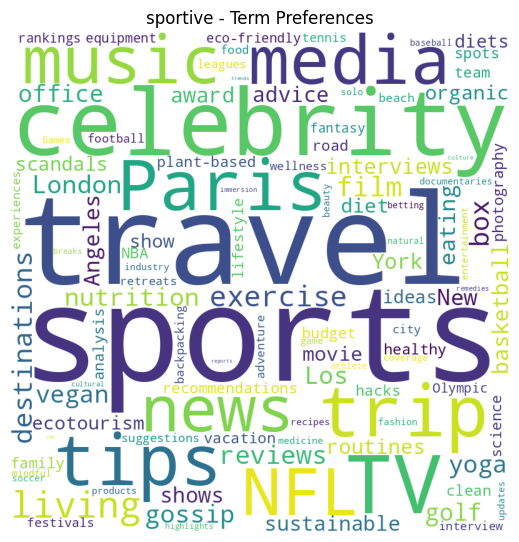

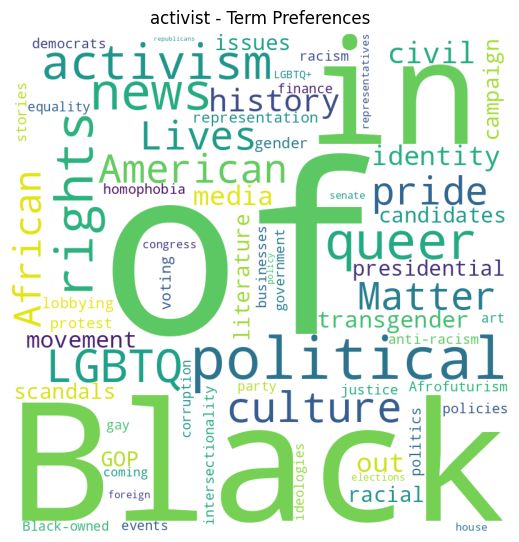

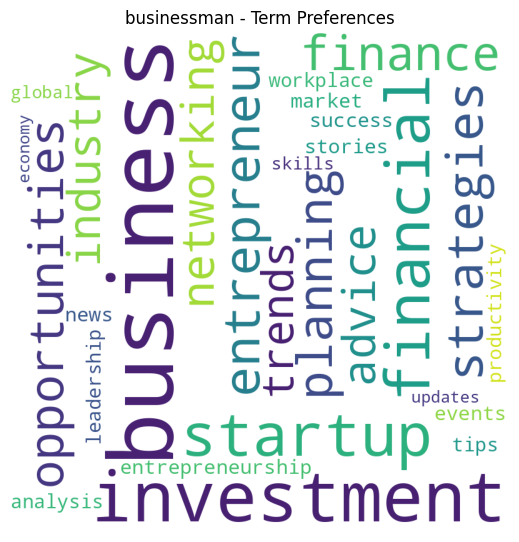

In [26]:
# For each of the user profile term vectors, we will plot a word cloud
for i, user in enumerate(targeted_users):
  wc = WordCloud(width=800, height=800, background_color='white', max_words=150, colormap='viridis').generate_from_frequencies(term_preferences[i])
  plt.figure(figsize=(8, 5), facecolor=None)
  plt.imshow(wc)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.title(f"{user[0].user_id} - Term Preferences")
  plt.show()